In [140]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [141]:
# import data
df = pd.read_excel('data.xlsx')
print(df.shape)
print(df.dtypes)

(3033, 10)
User ID                  int64
Day Of Week     datetime64[ns]
Unnamed: 2              object
Show                    object
Season                   int64
Episode                  int64
Time Watched             int64
Gender                  object
Completed              float64
Time of Day              int64
dtype: object


In [142]:
# correct the columns names
df = df.rename(columns = {'Day Of Week': 'Date'})
df = df.rename(columns = {'Unnamed: 2': 'Day Of Week'})

In [143]:
df.head()

,User ID,Date,Day Of Week,Show,Season,Episode,Time Watched,Gender,Completed,Time of Day
0,117752,2019-02-12,Tuesday,Stranger Things,2,6,51,Female,1.0,1
1,28615,2019-02-12,Tuesday,Stranger Things,2,6,2,Female,0.0,0
2,72226,2019-02-12,Tuesday,Stranger Things,2,3,5,Female,0.0,1
3,62565,2019-02-09,Saturday,Stranger Things,2,10,59,Female,1.0,1
4,3494,2019-02-12,Tuesday,Stranger Things,2,1,33,Female,1.0,0


In [144]:
# drop the feature
cols_to_drop = ['Time of Day']
df = df.drop(cols_to_drop, axis=1)

In [145]:
# display numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# display non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['User ID' 'Season' 'Episode' 'Time Watched' 'Completed']
['Date' 'Day Of Week' 'Show' 'Gender']


User ID - 0%
Date - 0%
Day Of Week - 0%
Show - 0%
Season - 0%
Episode - 0%
Time Watched - 0%
Gender - 3%
Completed - 1%


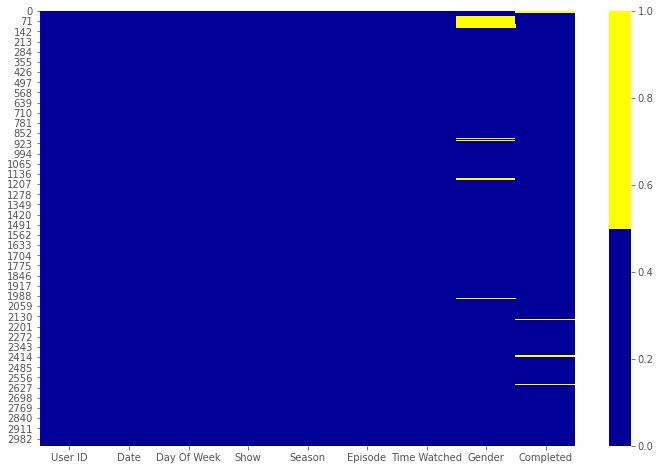

In [146]:
# check missing data
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

# check missing data boxplot
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

In [147]:
# replace Completed columns missing values with the median.
med = df['Completed'].median()
print(med)
df['Completed'] = df['Completed'].fillna(med)

# replace Gender columns missing values
df['Gender'] = df['Gender'].fillna('NA')

0.0


<AxesSubplot:>

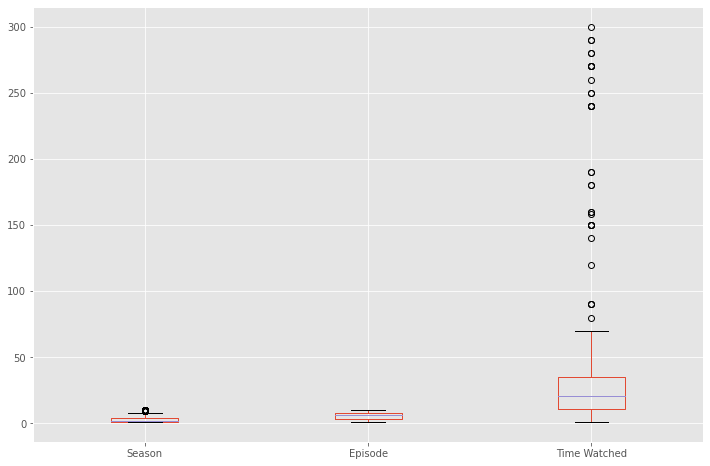

In [148]:
# check for outliers
df.boxplot(column=['Season', 'Episode', 'Time Watched'])

<AxesSubplot:>

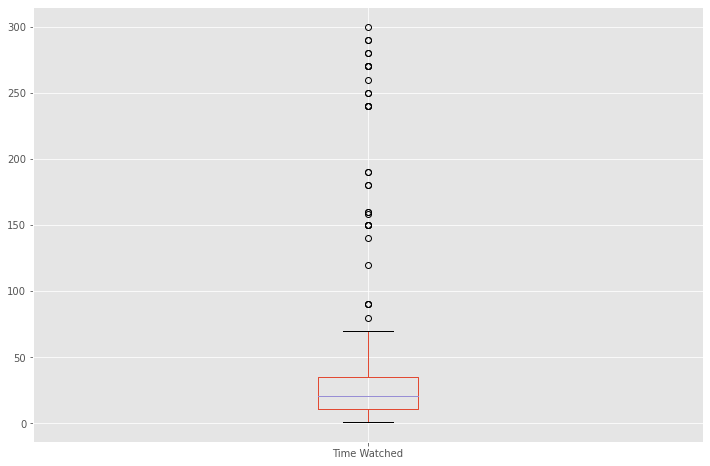

In [149]:
df.boxplot(column=['Time Watched'])

<AxesSubplot:>

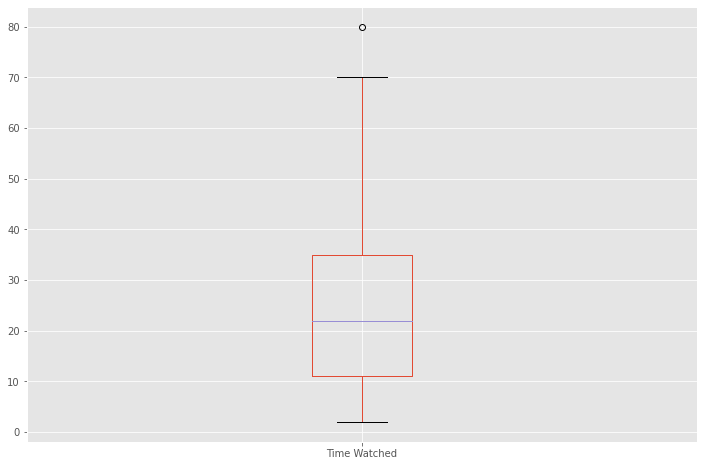

In [150]:
# delete the outliers row
new = df["Time Watched"].quantile(0.99)
df[df["Time Watched"] < q]
new_low = df["Time Watched"].quantile(0.01)
new_high  = df["Time Watched"].quantile(0.99)

df = df[(df["Time Watched"] < new_high) & (df["Time Watched"] > new_low)]
df.boxplot(column=['Time Watched'])

array([[<AxesSubplot:title={'center':'User ID'}>,
        <AxesSubplot:title={'center':'Season'}>],
       [<AxesSubplot:title={'center':'Episode'}>,
        <AxesSubplot:title={'center':'Time Watched'}>],
       [<AxesSubplot:title={'center':'Completed'}>, <AxesSubplot:>]],
      dtype=object)

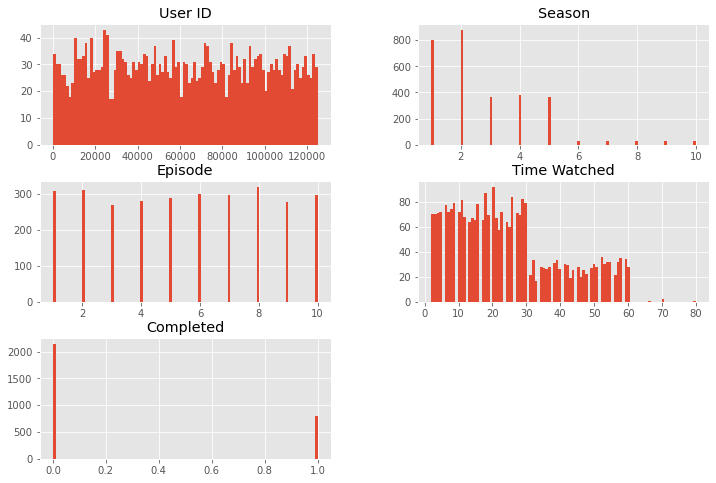

In [151]:
df.hist(bins=100)

In [153]:
df.to_excel("clean data.xlsx") 